# Uso de PCA (Principal Components Analysis)
Por Rodolfo Antonio Zea Posadas

En este notebook vamos a implementar PCA, para **reducir la dimensionalidad** de los distintos features obtenidos a partir de de las imágenes de perros obtenidas del dataset. Una vez se ha aplicado reducción de dimensionalidad, se aplica clustering para clasificar la información obtenida a partir del dataset.

Dataset: [Dog Breed Identification](https://www.kaggle.com/c/dog-breed-identification/data)

In [76]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as pltc
from random import sample
import pandas as pd
import imageio as imio

#### Pre-procesamiento

El pre-procesamiento ya fue realizado y el dataset preparado y esta listo para usarse, para esto se aplicó un proceso conocido como "transfer learning" usando la red neuronal "Inception" de Google. 

Estas features/características fueron almacenadas en un matriz de numpy.

### Referencias opcionales para transfer learning y "Google inception"
##### Inception
https://www.tensorflow.org/tutorials/image_recognition

https://research.googleblog.com/2016/03/train-your-own-image-classifier-with.html

##### Transfer Learning
https://www.datacamp.com/community/tutorials/transfer-learning

In [6]:
images_inception_features = './pre-processing/training_inception_features_array.npy'
training_image_labels_array = './pre-processing/training_image_labels_array.npy'
training_image_names_array = './pre-processing/training_image_names_array.npy'

In [83]:
TRAIN_DICTIONARY_KEYS = ["images", "label","features"]

training_set_dict = dict()
    
training_set_dict['images_name'] = np.load(training_image_names_array, allow_pickle=True)
training_set_dict['label'] = np.load(training_image_labels_array, allow_pickle=True)
training_set_dict['features'] = np.load(images_inception_features, allow_pickle=True)

# PCA
La data la vamos a manejar en los siguientes 3 arreglos: 

- features    : features de la imagen dadas por google Inception
- labels      : label de la imagen, identifica que raza es
- images_name : nombre de la imgen original, si descargan el dataset con link en la descripcion pueden buscar la imagen original por este nombre.

In [12]:
# Cargamos las features y las labes de cada feature
features = training_set_dict['features']
labels = training_set_dict['label']
images_name = training_set_dict['images_name']

In [14]:
# Mostramos la forma que tiene nuestro array de features
features.shape

(10222, 2048)

Aplicamos PCA a nuestras features utilizando scikitlearn. Reduciremos la dimensionalidad del dataset de features a 2 dimensiones.

In [82]:
# Reducimos la dimensionalidad del dataset a 2 dimensiones.
pca = PCA(n_components = 2)
features_reducidas = pca.fit_transform(features)

Vemos que se ha aplicado reducción de dimensionalidad utilizando PCA para reducir de 2048 features a únicamente 2.

In [18]:
features_reducidas.shape

(10222, 2)

Graficamos nuestras features ya reducidas a 2 dimensiones.

Text(0, 0.5, 'feature 2')

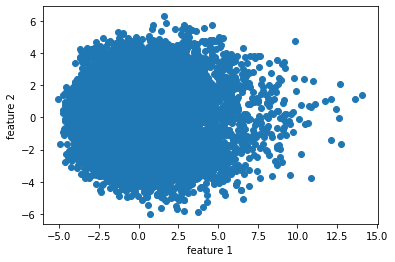

In [30]:
plt.scatter(features_reducidas[:, 0], features_reducidas[:, 1])
plt.xlabel('feature 1')
plt.ylabel('feature 2')

# Clustering utilizando K-means

Utilizaremos sklearn para aplicar K-means a nuestro dataset de 2 dimensiones para clasificar las distintas razas obtenidas de nuestro dataset de features inicial. 

Utilizaremos el dataset de features para saber cuántos clusters deseamos crear.

In [36]:
breeds = np.unique(labels)
n_clusters = breeds.shape[0]
n_clusters

120

Vemos que el dataset de labels contiene 120 distintas razas de perros, las cuales nos servirán para especificar que utilizaremos 120 distintos clusters.

In [32]:
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(features_reducidas)
kmeans.labels_

array([ 69,  76, 112, ...,  76,  21, 116])

In [81]:
clusters = KMeans.fit_predict(kmeans, features_reducidas, y=None, sample_weight=None)
kmeans.cluster_centers_.shape

(120, 2)

Es posible apreciar que KMeans ha identificado 120 puntos (cada uno de 2 coordenadas, es decir, 2 dimensiones) obtenidas a partir del dataset de features reducidas. Procedemos a gráficar nuevamente el dataset junto con los centros de los clusters para ver los 120 distintos clusters.

In [34]:
centers = kmeans.cluster_centers_
centers

array([[ 2.1535597 ,  1.689304  ],
       [-3.3442366 ,  0.03177532],
       [ 1.011816  , -3.6690886 ],
       [-0.4401263 ,  1.1910878 ],
       [ 5.3779116 ,  0.05628419],
       [-0.04175203, -1.5395036 ],
       [-0.91378677,  2.4595435 ],
       [ 3.0520387 , -3.3613899 ],
       [-3.1730468 , -1.96352   ],
       [ 2.151962  ,  3.359735  ],
       [-2.435147  ,  2.2388637 ],
       [ 9.269664  , -0.16242217],
       [ 5.431469  , -2.853286  ],
       [-1.7283787 , -0.36186743],
       [ 1.9080764 , -1.6353984 ],
       [-1.0419582 , -3.1349933 ],
       [ 3.204611  ,  1.696539  ],
       [ 5.3279343 ,  2.6208332 ],
       [ 0.7093729 , -0.09914674],
       [-1.4499186 ,  3.17281   ],
       [-0.8404165 , -1.58985   ],
       [ 4.3062334 ,  0.80627245],
       [ 0.28319794,  1.5163335 ],
       [ 3.566989  , -1.3678967 ],
       [ 0.25706667,  3.2379112 ],
       [ 1.2338866 , -2.5635781 ],
       [-2.2942996 , -2.371321  ],
       [-3.148664  ,  0.9263434 ],
       [-1.692822  ,

In [74]:
df = pd.DataFrame({'cluster':kmeans.labels_, 'breed':labels})
df

,cluster,breed
0,69,boston_bull
1,76,dingo
2,112,pekinese
3,88,bluetick
4,51,golden_retriever
5,39,bedlington_terrier
6,70,bedlington_terrier
7,94,borzoi
8,114,basenji
9,49,scottish_deerhound


Ordenamos nuestro dataframe por el número de cluster, seguido de la raza de forma ascendente.

In [75]:
df_sorted = df.sort_values(by=['cluster', 'breed'])
df_sorted

,cluster,breed
3615,0,airedale
5633,0,airedale
768,0,american_staffordshire_terrier
5951,0,american_staffordshire_terrier
1414,0,basenji
5121,0,basenji
6497,0,bernese_mountain_dog
4295,0,border_terrier
4228,0,boston_bull
5151,0,boston_bull


# Conclusión 


Como resultado, es posible observar que los distintos clusters encontrados utilizando K-means sobre un dataset al que se le aplicó reducción de dimensionalidad utilizando PCA, no coincide con la raza a la que pertenece cada uno de los elementos del dataset.